In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, RidgeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor, StackingRegressor, StackingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import make_scorer
from sklearn.base import RegressorMixin, ClassifierMixin, BaseEstimator
from sklearn.ensemble import VotingClassifier

from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor


### Data Collection

In [91]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module6/exercise/module6_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module6/exercise/module6_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module6_exercise_train.csv')
download_file(test_data_url, 'module6_exercise_test.csv')

Downloaded module6_exercise_train.csv from https://www.raphaelcousin.com/modules/data-science-practice/module6/exercise/module6_exercise_train.csv
Downloaded module6_exercise_test.csv from https://www.raphaelcousin.com/modules/data-science-practice/module6/exercise/module6_exercise_test.csv


In [92]:
data_train = pd.read_csv('module6_exercise_train.csv', index_col='index')
data_test = pd.read_csv('module6_exercise_test.csv', index_col='index')

### Data Analysis

In [93]:
data_train

,09_30_00,09_50_00,10_10_00,10_30_00,10_50_00,11_10_00,11_30_00,11_50_00,12_10_00,12_30_00,12_50_00,13_10_00,13_30_00,13_50_00,14_10_00,14_30_00,14_50_00,15_10_00,end_of_day_return
index,,,,,,,,,,,,,,,,,,,
0,-3.345378,0.471913,0.111795,0.897695,-1.836632,0.853765,-1.169854,-0.515758,-0.672838,0.737822,-0.110476,0.120739,0.658008,-0.033507,-0.809134,-0.286582,-0.431717,-0.094759,-0.741115
1,0.325809,0.367349,-0.048372,-1.513650,0.355659,-3.117421,-0.881352,-0.007122,0.243771,0.016151,0.114610,-0.604529,0.148780,-0.229934,-0.506916,-0.604501,-0.348392,0.318222,1.174188
2,1.105315,1.767107,0.053923,0.001599,1.120131,-0.358522,-1.279510,-0.229908,0.918732,0.486627,0.143440,0.201272,-0.166683,-0.701750,-0.431819,-0.418378,0.645661,0.389446,-1.583453
3,-0.139515,0.400993,1.376735,0.248226,0.896831,-0.064874,-0.546736,-0.596431,-0.261391,0.233740,-0.242694,-0.713535,-0.331204,0.165809,-0.330894,0.883535,0.907813,-0.191447,1.614671
4,6.826520,2.643832,-0.686910,-0.175818,0.418767,-0.550301,-0.002805,-0.272078,0.798230,-0.481628,0.281879,0.762998,2.641929,-2.324375,-0.402507,0.155151,-0.467507,-0.596658,1.183321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-0.883029,0.062304,-0.297792,-0.512609,0.147675,0.128645,-0.722808,-0.112308,0.086121,-0.313414,0.407098,0.335073,0.681523,-0.380009,0.926100,-0.608350,0.619678,-0.334050,0.649858
3996,0.688887,-0.667074,0.346701,1.195935,-0.084245,0.007249,0.603659,-0.457421,0.383087,-0.004021,0.564976,0.397662,0.127530,0.412853,-0.078965,-0.017075,-0.219030,0.010699,0.487709
3997,0.246288,0.175187,0.463585,0.134366,-0.500703,1.491530,0.637691,0.048974,-0.218061,0.322912,-0.215735,-1.183474,-0.444753,0.468896,0.337624,0.367041,-0.318075,0.696240,0.111035


In [94]:
data_test

,09_30_00,09_50_00,10_10_00,10_30_00,10_50_00,11_10_00,11_30_00,11_50_00,12_10_00,12_30_00,12_50_00,13_10_00,13_30_00,13_50_00,14_10_00,14_30_00,14_50_00,15_10_00
index,,,,,,,,,,,,,,,,,,
9000,-0.090754,-1.786981,-0.470490,0.545190,1.048661,2.133359,0.769342,0.829361,0.329543,-0.260203,0.557235,0.052095,-0.083066,-0.910045,-0.956864,0.058267,-0.406571,-0.647216
9001,7.611001,0.247861,-2.001656,-0.804107,-0.473829,1.259438,0.195555,0.101885,-1.077060,0.573665,-0.434945,-0.183208,0.463489,-0.559725,0.091081,-0.084349,0.096026,0.091618
9002,1.150194,0.091151,2.545506,0.775302,-1.025222,-0.894295,-0.440365,0.671856,0.428863,0.485069,-0.782287,-0.352444,0.257920,0.526284,-0.029759,-0.797493,0.743176,-0.220204
9003,-0.884874,-1.103034,0.755916,-0.412053,0.178287,-0.104350,-0.212248,0.081726,0.380151,0.005660,-0.501693,0.817424,-0.470671,0.140688,1.406956,1.754916,0.261623,-0.495981
9004,-0.589833,0.379596,-0.545424,-0.217812,-0.730794,-0.480085,0.470663,1.298896,-0.710654,0.867138,1.515816,0.197528,0.756792,0.090558,-0.819575,0.136961,0.023876,-0.451478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.170209,-0.057276,-0.822165,-1.232996,-1.187110,0.179970,0.212011,-0.802815,-1.420647,1.098860,0.010170,-0.776480,-0.428853,-1.547797,-0.111830,0.130183,-1.493579,-0.862974
9996,0.527195,-1.883375,-1.468747,-0.749872,-0.541944,1.093662,-1.257120,-2.523593,-1.534209,0.226028,0.215094,0.414398,1.123071,-1.157484,0.673495,-0.318814,0.856825,0.579775
9997,0.342242,-1.807571,0.777167,-0.825105,0.058622,-1.090268,0.338895,0.130677,-0.234081,0.270528,-0.837228,-0.364189,0.379240,0.127673,-1.070985,0.662475,-0.409687,-0.223988


In [95]:
data_train.describe()

,09_30_00,09_50_00,10_10_00,10_30_00,10_50_00,11_10_00,11_30_00,11_50_00,12_10_00,12_30_00,12_50_00,13_10_00,13_30_00,13_50_00,14_10_00,14_30_00,14_50_00,15_10_00,end_of_day_return
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.141680,0.034964,0.020505,0.010436,-0.020574,0.002945,-0.010331,0.018534,0.005757,-0.016174,0.003401,-0.007827,0.009027,-0.021716,-0.018219,-0.019692,-0.012845,-0.005857,0.019466
std,5.257948,2.723808,1.352428,1.193797,1.066787,1.028344,0.980049,0.916572,0.793494,0.842957,0.748935,0.755444,0.742869,0.810765,0.743790,0.739733,0.735295,0.638472,0.962818
min,-153.020090,-14.173563,-11.462649,-8.014786,-6.884508,-6.174871,-7.197151,-12.981744,-5.170963,-10.867723,-5.270753,-6.466934,-3.780217,-7.522321,-3.853110,-4.318858,-6.421411,-3.553236,-8.210463
25%,-1.659958,-0.913043,-0.720355,-0.689361,-0.626834,-0.576174,-0.532172,-0.469984,-0.459903,-0.459817,-0.393010,-0.429838,-0.413955,-0.441057,-0.438892,-0.435665,-0.404864,-0.357411,-0.502152
50%,0.024667,-0.002644,0.008267,0.003442,-0.003890,-0.011194,-0.017745,0.014596,-0.010351,-0.034659,0.000475,-0.017674,0.004193,-0.015532,-0.030075,-0.031709,-0.007807,-0.004821,0.012860
75%,1.613584,0.925147,0.743400,0.680686,0.578904,0.582196,0.522556,0.492078,0.442551,0.413838,0.411547,0.397960,0.419423,0.412761,0.377625,0.391245,0.386953,0.342684,0.538451
max,42.788716,134.323450,10.271912,8.297362,12.070118,13.097849,10.406605,6.349618,4.765165,8.785591,7.543055,7.598514,5.996648,5.198389,6.403935,5.934699,5.290835,4.716630,11.468784


In [96]:
data_train.isnull().sum()

09_30_00             0
09_50_00             0
10_10_00             0
10_30_00             0
10_50_00             0
11_10_00             0
11_30_00             0
11_50_00             0
12_10_00             0
12_30_00             0
12_50_00             0
13_10_00             0
13_30_00             0
13_50_00             0
14_10_00             0
14_30_00             0
14_50_00             0
15_10_00             0
end_of_day_return    0
dtype: int64

In [97]:
data_test.isnull().sum()

09_30_00    0
09_50_00    0
10_10_00    0
10_30_00    0
10_50_00    0
11_10_00    0
11_30_00    0
11_50_00    0
12_10_00    0
12_30_00    0
12_50_00    0
13_10_00    0
13_30_00    0
13_50_00    0
14_10_00    0
14_30_00    0
14_50_00    0
15_10_00    0
dtype: int64

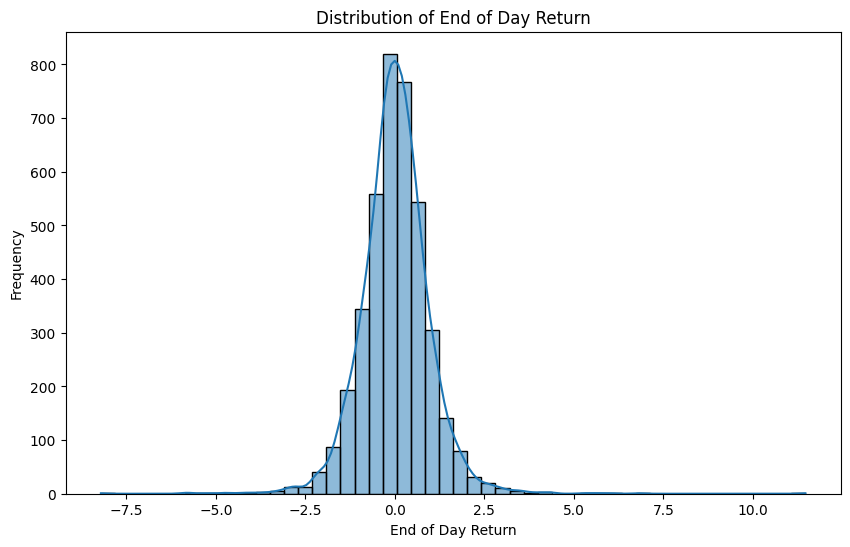

In [98]:
# Plot the distribution using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data_train['end_of_day_return'], bins=50, kde=True)
plt.title('Distribution of End of Day Return')
plt.xlabel('End of Day Return')
plt.ylabel('Frequency')
plt.show()

### Model Building and Evaluate

In [99]:
y = data_train.pop('end_of_day_return')
X = data_train.copy()

In [100]:
def weighted_accuracy(y_true, y_pred):
    weights = np.abs(y_true)
    
    # Compute the sign of true and predicted values
    sign_true = np.sign(y_true)
    sign_pred = np.sign(y_pred)
    
    # Correct predictions where the sign of the true and predicted values match
    correct_predictions = sign_true == sign_pred
    
    # Compute the weighted accuracy
    weighted_acc = np.sum(weights * correct_predictions) / np.sum(weights)
    
    return weighted_acc

In [101]:
# Function to plot the evaluation results
def plot_results(mse_train, mse_test, w_acc_train, w_acc_test):
    plt.figure(figsize=(12, 6))

    # MSE plot
    plt.subplot(1, 2, 1)
    plt.plot(mse_train, label="Train MSE", marker='o')
    plt.plot(mse_test, label="Test MSE", marker='o')
    plt.fill_between(range(len(mse_train)), np.min(mse_train), np.max(mse_train), color='blue', alpha=0.1)
    plt.fill_between(range(len(mse_test)), np.min(mse_test), np.max(mse_test), color='orange', alpha=0.1)
    plt.title("MSE over Folds")
    plt.xlabel("Fold")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)

    # weighted_accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(w_acc_train, label="Train weighted_accuracy", marker='o')
    plt.plot(w_acc_test, label="Test weighted_accuracy", marker='o')
    plt.fill_between(range(len(w_acc_train)), np.min(w_acc_train), np.max(w_acc_train), color='blue', alpha=0.1)
    plt.fill_between(range(len(w_acc_test)), np.min(w_acc_test), np.max(w_acc_test), color='orange', alpha=0.1)
    plt.title("weighted_accuracy over Folds")
    plt.xlabel("Fold")
    plt.ylabel("weighted_accuracy")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def plot_multi_model_results(results):
    # Set up the plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))
    
    # Colors for train and test
    train_color = 'skyblue'
    test_color = 'lightgreen'
    
    # Plot MSE
    ax1.set_title('Mean Squared Error (MSE) Comparison', fontsize=16)
    ax1.set_ylabel('MSE', fontsize=12)
    ax1.set_xlabel('Models', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Plot weighted_accuracy
    ax2.set_title('weighted_accuracy Comparison', fontsize=16)
    ax2.set_ylabel('weighted_accuracy', fontsize=12)
    ax2.set_xlabel('Models', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    x = np.arange(len(results))
    width = 0.35
    
    for i, (model_name, scores) in enumerate(results.items()):
        # MSE
        mse_train = scores['mse_train']
        mse_test = scores['mse_test']
        
        ax1.bar(x[i] - width/2, np.mean(mse_train), width, label='Train' if i == 0 else "", 
                color=train_color, alpha=0.7)
        ax1.bar(x[i] + width/2, np.mean(mse_test), width, label='Test' if i == 0 else "", 
                color=test_color, alpha=0.7)
        
        ax1.errorbar(x[i] - width/2, np.mean(mse_train), 
                     yerr=[[np.mean(mse_train)-np.min(mse_train)], [np.max(mse_train)-np.mean(mse_train)]], 
                     fmt='none', ecolor='black', capsize=5)
        ax1.errorbar(x[i] + width/2, np.mean(mse_test), 
                     yerr=[[np.mean(mse_test)-np.min(mse_test)], [np.max(mse_test)-np.mean(mse_test)]], 
                     fmt='none', ecolor='black', capsize=5)
        
        # weighted_accuracy
        w_acc_train = scores['w_acc_train']
        w_acc_test = scores['w_acc_test']
        
        ax2.bar(x[i] - width/2, np.mean(w_acc_train), width, label='Train' if i == 0 else "", 
                color=train_color, alpha=0.7)
        ax2.bar(x[i] + width/2, np.mean(w_acc_test), width, label='Test' if i == 0 else "", 
                color=test_color, alpha=0.7)
        
        ax2.errorbar(x[i] - width/2, np.mean(w_acc_train), 
                     yerr=[[np.mean(w_acc_train)-np.min(w_acc_train)], [np.max(w_acc_train)-np.mean(w_acc_train)]], 
                     fmt='none', ecolor='black', capsize=5)
        ax2.errorbar(x[i] + width/2, np.mean(w_acc_test), 
                     yerr=[[np.mean(w_acc_test)-np.min(w_acc_test)], [np.max(w_acc_test)-np.mean(w_acc_test)]], 
                     fmt='none', ecolor='black', capsize=5)
    
    ax1.set_xticks(x)
    ax1.set_xticklabels(results.keys(), rotation=45, ha='right')
    ax2.set_xticks(x)
    ax2.set_xticklabels(results.keys(), rotation=45, ha='right')
    
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()

#### Simple Baseline

In [102]:
# Function to handle train-test evaluation in a fold
def train_and_evaluate(X_train, X_test, y_train, y_test, model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on train set
    y_pred_train = model.predict(X_train)
    # Make predictions on train set
    y_pred_test = model.predict(X_test)
    
    # Compute MSE for train and test
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    # Compute weighted_accuracy
    
    w_acc_train = weighted_accuracy(y_train, y_pred_train)
    w_acc_test = weighted_accuracy(y_test, y_pred_test)
    
    return mse_train, mse_test, w_acc_train, w_acc_test


def run_multi_model_cv(X, y, models, n_splits=5):
    fold = KFold(n_splits=n_splits)
    results = {name: {'mse_train': [], 'mse_test': [], 'w_acc_train': [], 'w_acc_test': []} 
               for name in models.keys()}
    
    for train_index, test_index in fold.split(X, y):
        X_train, X_test = X.iloc[train_index].copy(), X.iloc[test_index].copy()
        y_train, y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()
        
        for name, model in models.items():
            mse_train, mse_test, w_acc_train, w_acc_test = train_and_evaluate(
                X_train, X_test, y_train, y_test, model
            )
            results[name]['mse_train'].append(mse_train)
            results[name]['mse_test'].append(mse_test)
            results[name]['w_acc_train'].append(w_acc_train)
            results[name]['w_acc_test'].append(w_acc_test)
        # Find the model with the best mean w_acc test score
    best_mean_w_acc = -1
    best_model = None
    best_min_w_acc = None
    best_max_w_acc = None
    
    for name, result in results.items():
        w_acc_test_scores = result['w_acc_test']
        mean_w_acc_test = sum(w_acc_test_scores) / len(w_acc_test_scores)  # Calculate mean w_acc score
        min_w_acc_test = min(w_acc_test_scores)  # Minimum w_acc score
        max_w_acc_test = max(w_acc_test_scores)  # Maximum w_acc score
        
        if mean_w_acc_test > best_mean_w_acc:
            best_mean_w_acc = mean_w_acc_test
            best_min_w_acc = min_w_acc_test
            best_max_w_acc = max_w_acc_test
            best_model = name
    
    # Print the best mean w_acc test score, min, max, and the associated model
    print(f"Best mean w_acc test score: {best_mean_w_acc:.4f} by model: {best_model}")
    print(f"Min w_acc test score: {best_min_w_acc:.4f}, Max w_acc test score: {best_max_w_acc:.4f}")
    return results


In [103]:
# Step 1: Run cross-validation
results = run_multi_model_cv(X, y, {"RandomForestRegressor": RandomForestRegressor(n_jobs=-1)})

Best mean w_acc test score: 0.5181 by model: RandomForestRegressor
Min w_acc test score: 0.5104, Max w_acc test score: 0.5360


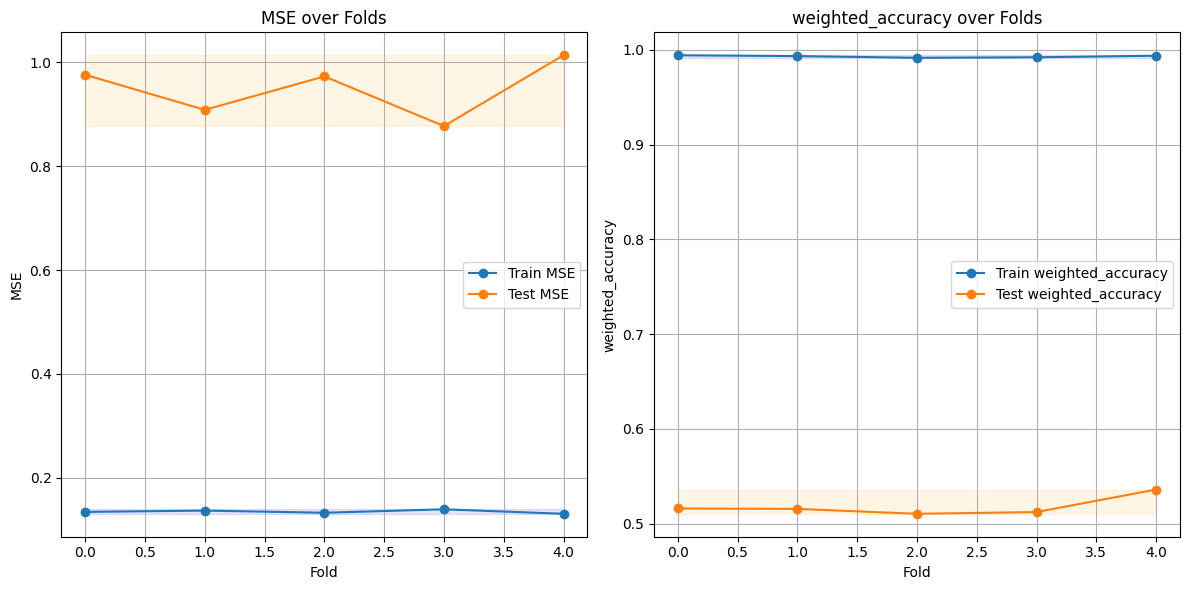

In [104]:
# Step 2: Plot the results
plot_results(results["RandomForestRegressor"]["mse_train"],
             results["RandomForestRegressor"]["mse_test"],
             results["RandomForestRegressor"]["w_acc_train"],
             results["RandomForestRegressor"]["w_acc_test"])

In [105]:
models = {
    'Ridge': Ridge(),
    'Decision Tree Regressor': RandomForestRegressor(n_jobs=-1)
    }

In [106]:
# Run cross-validation for regression models
results = run_multi_model_cv(X, y, models)

Best mean w_acc test score: 0.5254 by model: Ridge
Min w_acc test score: 0.4869, Max w_acc test score: 0.5544


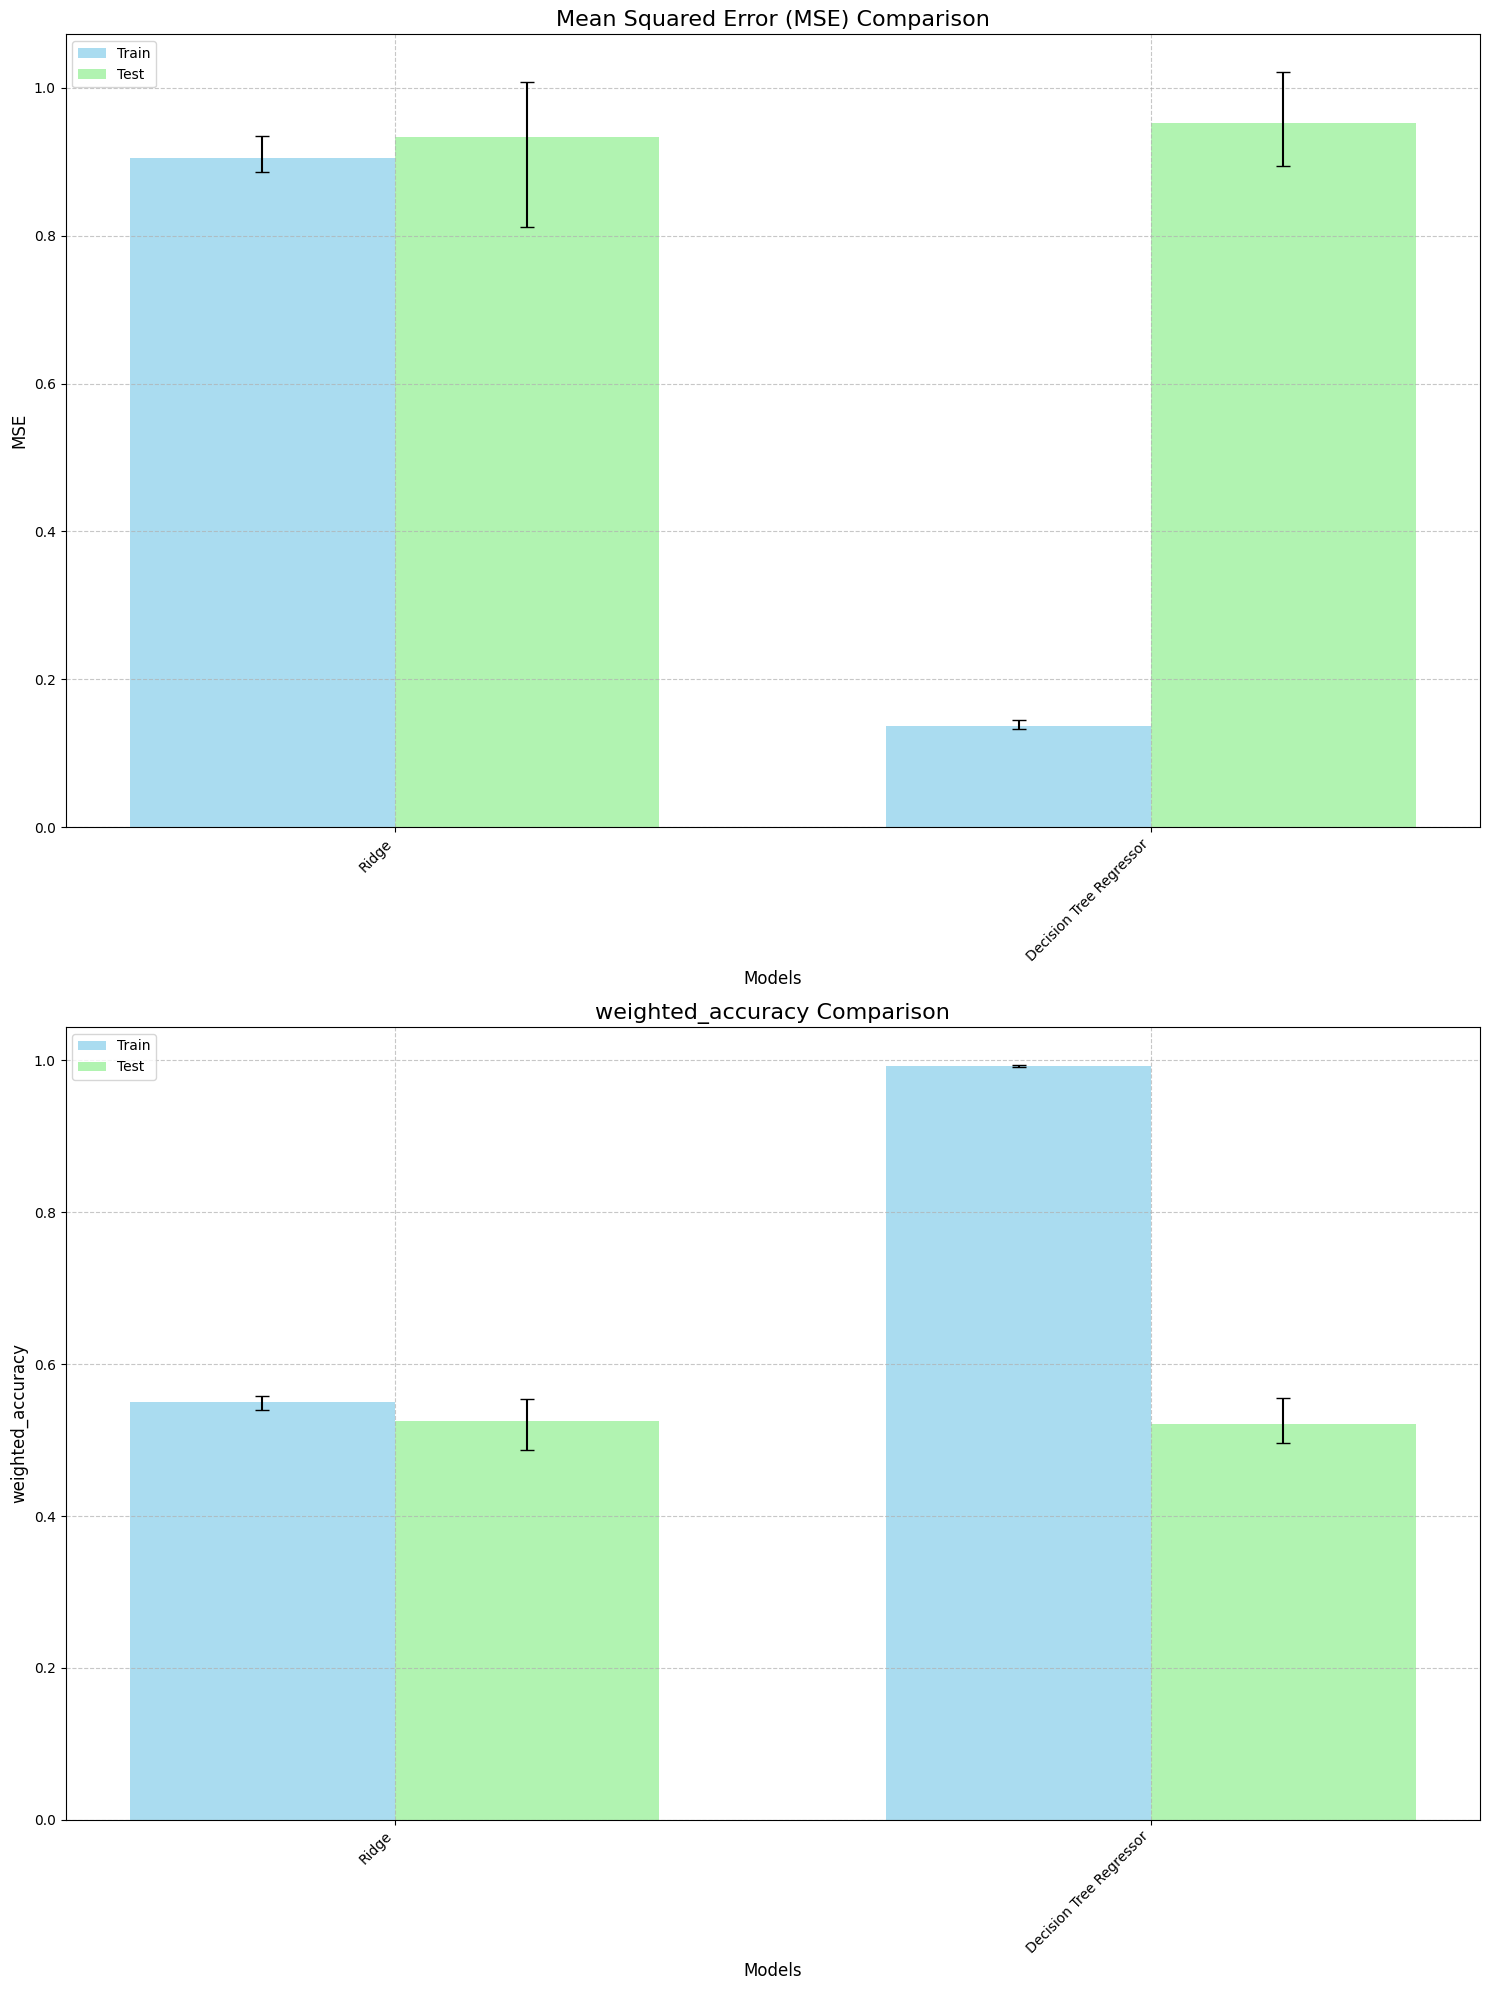

In [107]:
# Plot MSE results for regression models
plot_multi_model_results(results)

#### Manage properly the objective weighted_accuracy
should we create different classes? custom loss?

Create Compare and Optimize different models

#### Minimisation of the weighted_accuracy

##### Linear models

We try linear models because the distribution of Y seems to be Gaussian.

In [108]:
models = {
    'OLS': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
    }

In [109]:
# Run cross-validation for regression models
results = run_multi_model_cv(X, y, models)

Best mean w_acc test score: 0.5254 by model: OLS
Min w_acc test score: 0.4869, Max w_acc test score: 0.5544


We try a GridSearch on the parameter of Ridge.

In [110]:
# Hyperparameter values
alphas = [100, 500, 750, 1000, 1250]

# Creation of the model dictionary
ridge_models = {}

for alpha in alphas:
    name = f"ridge_alpha{alpha}"
    ridge_models[name] = Ridge(alpha=alpha)

# List of models
for k, v in list(ridge_models.items()):
    print(k, ":", v)

ridge_alpha100 : Ridge(alpha=100)
ridge_alpha500 : Ridge(alpha=500)
ridge_alpha750 : Ridge(alpha=750)
ridge_alpha1000 : Ridge(alpha=1000)
ridge_alpha1250 : Ridge(alpha=1250)


In [111]:
# Run cross-validation for regression models
ridge_results = run_multi_model_cv(X, y, ridge_models)

Best mean w_acc test score: 0.5292 by model: ridge_alpha750
Min w_acc test score: 0.4835, Max w_acc test score: 0.5683


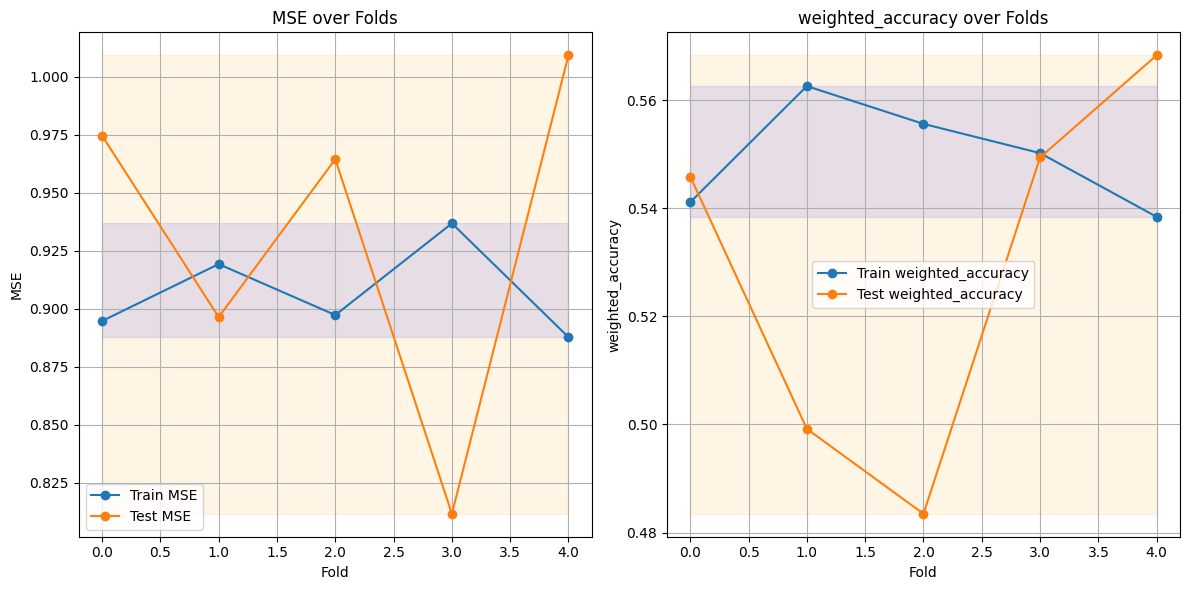

In [112]:
# Plot the ridge_results
plot_results(ridge_results["ridge_alpha750"]["mse_train"],
             ridge_results["ridge_alpha750"]["mse_test"],
             ridge_results["ridge_alpha750"]["w_acc_train"],
             ridge_results["ridge_alpha750"]["w_acc_test"])

We try a GridSearch on the parameter of Lasso.

In [113]:
# Hyperparameter values
alphas = [0.001, 0.005, 0.01, 0.1, 1]

# Creation of the model dictionary
lasso_models = {}

for alpha in alphas:
    name = f"lasso_alpha{alpha}"
    lasso_models[name] = Lasso(alpha=alpha)  
    
# List of models
for k, v in list(lasso_models.items()):
    print(k, ":", v)

lasso_alpha0.001 : Lasso(alpha=0.001)
lasso_alpha0.005 : Lasso(alpha=0.005)
lasso_alpha0.01 : Lasso(alpha=0.01)
lasso_alpha0.1 : Lasso(alpha=0.1)
lasso_alpha1 : Lasso(alpha=1)


In [114]:
# Run cross-validation for regression models
lasso_results = run_multi_model_cv(X, y, lasso_models)

Best mean w_acc test score: 0.5259 by model: lasso_alpha0.01
Min w_acc test score: 0.4743, Max w_acc test score: 0.5492


Our best model is Ridge followed by the Lasso.

We try Gauss-Lasso and Ridge after Lasso (Ridge-Lasso).

In [115]:
def GaussAndRidge_Lasso(X, y, alpha, count, alphas_ridge, n_splits=5):
    fold = KFold(n_splits=n_splits)
    n, p = X.shape
    X_count = np.zeros(p)
    w_acc_test = []

    for train_index, test_index in fold.split(X, y):
        X_train, X_test = X.iloc[train_index].copy(), X.iloc[test_index].copy()
        y_train, y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()

        # Create the lasso
        lasso = Lasso(alpha = alpha)
        
        # Train the lasso
        lasso.fit(X_train, y_train)

        # Make predictions on test set
        y_pred_test = lasso.predict(X_test)
    
        # Compute weighted_accuracy
        w_acc_test.append(weighted_accuracy(y_test, y_pred_test))

        # Retrieving selected columns
        selected_mask = lasso.coef_ != 0
        selected_features = X.columns[selected_mask]

        # Count the number of selections
        X_count = X_count + selected_mask
    

    mean_w_acc_test = sum(w_acc_test) / len(w_acc_test)  # Calculate mean w_acc score
    min_w_acc_test = min(w_acc_test)  # Minimum w_acc score
    max_w_acc_test = max(w_acc_test)  # Maximum w_acc score

    # Print the mean w_acc test score, min and max of the lasso model
    print(f"Lasso (alpha={alpha}):")
    print(f"Mean w_acc test score: {mean_w_acc_test:.4f}")
    print(f"Min w_acc test score: {min_w_acc_test:.4f}, Max w_acc test score: {max_w_acc_test:.4f}")
    print("----------------------------------------------------------")

    # Selection of columns present at least count
    selected_mask = X_count >= count
    selected_features = X.columns[selected_mask]

    # Reduction of the dataset
    X_reduced = X[selected_features]

    # Training of a classic linear model and ridge models on the reduced dataset
    results = run_multi_model_cv(X_reduced, y, {"Gauss-Lasso":LinearRegression()})
    print("----------------------------------------------------------")
    # Creation of the model dictionary
    ridge_models = {}
    for alpha in alphas_ridge:
        name = f"Ridge-Lasso_alpha{alpha}"
        ridge_models[name] = Ridge(alpha=alpha)

    ridge_results = run_multi_model_cv(X_reduced, y, ridge_models)
    return results, ridge_results, X_reduced, selected_features


In [116]:
best_alpha_lasso = 0.01 # alpha of our best lasso model
best_count = 5 # We tested all the possible values by hand

# Hyperparameter values
alphas_ridge = [1200, 1225, 1250, 1275, 1300]

results, ridge_results, X_reduced, selected_features = GaussAndRidge_Lasso(X, y, alpha=best_alpha_lasso, count=best_count, alphas_ridge=alphas_ridge)

Lasso (alpha=0.01):
Mean w_acc test score: 0.5259
Min w_acc test score: 0.4743, Max w_acc test score: 0.5492
----------------------------------------------------------
Best mean w_acc test score: 0.5282 by model: Gauss-Lasso
Min w_acc test score: 0.4874, Max w_acc test score: 0.5662
----------------------------------------------------------
Best mean w_acc test score: 0.5299 by model: Ridge-Lasso_alpha1250
Min w_acc test score: 0.4847, Max w_acc test score: 0.5789


In [117]:
best_alpha_ridge_lasso = 1250

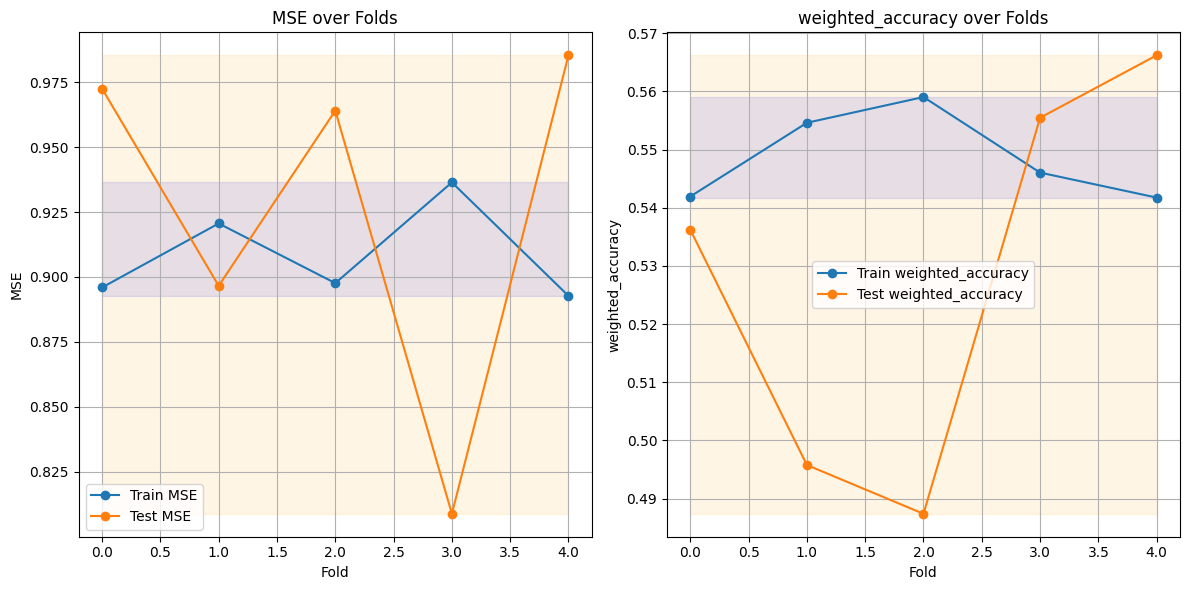

In [118]:
# Plot the results
plot_results(results["Gauss-Lasso"]["mse_train"],
             results["Gauss-Lasso"]["mse_test"],
             results["Gauss-Lasso"]["w_acc_train"],
             results["Gauss-Lasso"]["w_acc_test"])

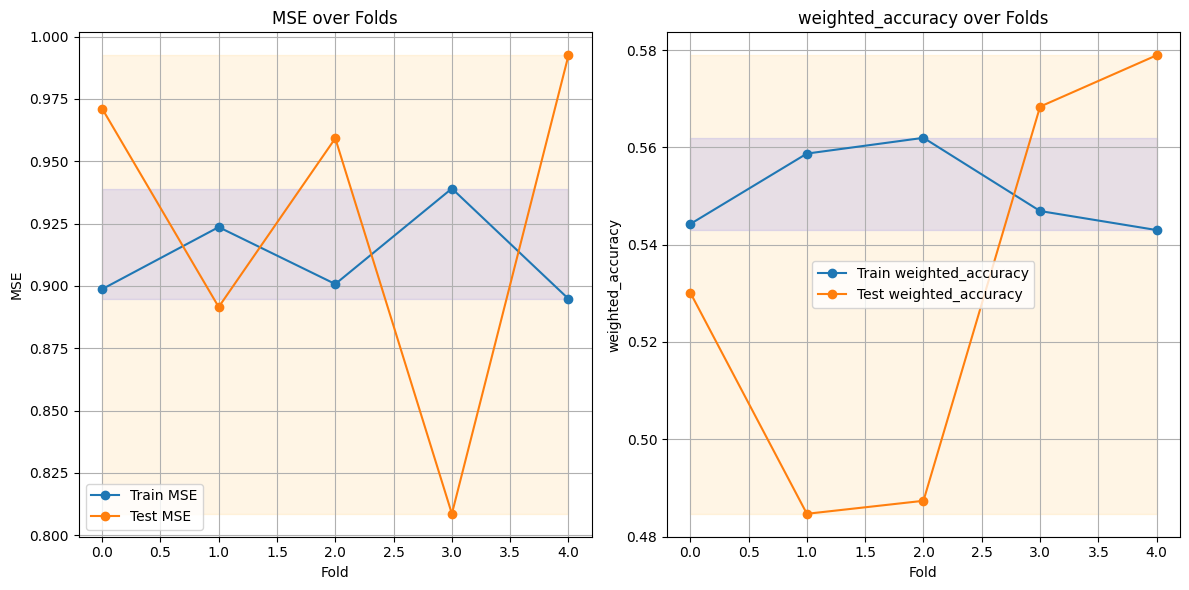

In [119]:
# Plot the results
plot_results(ridge_results["Ridge-Lasso_alpha1250"]["mse_train"],
             ridge_results["Ridge-Lasso_alpha1250"]["mse_test"],
             ridge_results["Ridge-Lasso_alpha1250"]["w_acc_train"],
             ridge_results["Ridge-Lasso_alpha1250"]["w_acc_test"])

Our best model is Ridge-Lasso followed by Gauss-Lasso.

##### Boosting

We try a GridSearch on the parameter of Xgboost.

In [120]:
# Hyperparameter values
max_depths = [8, 9, 10]
learning_rates = [0.95, 1, 1.05]
n_estimators = [33, 35, 37]

# Creation of the model dictionary
xgboost_models = {}
for depth in max_depths:
    for lr in learning_rates:
        for n_est in n_estimators:
            name = f"Xgboost_depth={depth}_lr={lr}_n_estimators={n_est}"
            xgboost_models[name] = XGBRegressor(max_depth=depth, learning_rate=lr, n_estimators=n_est)

print("Number of models:", len(xgboost_models))

Number of models: 27


In [121]:
# Run cross-validation for regression models
# xgboost_results = run_multi_model_cv(X, y, xgboost_models)

# Best mean w_acc test score: 0.5272 by model: Xgboost_depth=9_lr=1_n_estimators=35
# Min w_acc test score: 0.5073, Max w_acc test score: 0.5517

We try on the reduced dataset by Lasso.

In [122]:
# Hyperparameter values
max_depths = [7, 8, 9]
learning_rates = [1.95, 2, 2.05]
n_estimators = [105, 110, 115]

# Creation of the model dictionary
xgboost_models = {}
for depth in max_depths:
    for lr in learning_rates:
        for n_est in n_estimators:
            name = f"Xgboost_depth={depth}_lr={lr}_n_estimators={n_est}"
            xgboost_models[name] = XGBRegressor(max_depth=depth, learning_rate=lr, n_estimators=n_est)

print("Number of models:", len(xgboost_models))

Number of models: 27


In [123]:
# Run cross-validation for regression models
# xgboost_results = run_multi_model_cv(X_reduced, y, xgboost_models)

# Best mean w_acc test score: 0.5289 by model: Xgboost_depth=8_lr=2_n_estimators=110
# Min w_acc test score: 0.4993, Max w_acc test score: 0.5500

##### Stacking (Stacked Generalization)

In [124]:
def evaluate_model(X, y, model, n_splits=5):
    fold = KFold(n_splits=n_splits)
    w_acc_test = []

    for train_index, test_index in fold.split(X, y):
        X_train, X_test = X.iloc[train_index].copy(), X.iloc[test_index].copy()
        y_train, y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()
        
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on test set
        y_pred_test = model.predict(X_test)
    
        # Compute weighted_accuracy
        w_acc_test.append(weighted_accuracy(y_test, y_pred_test))
    

    mean_w_acc_test = sum(w_acc_test) / len(w_acc_test)  # Calculate mean w_acc score
    min_w_acc_test = min(w_acc_test)  # Minimum w_acc score
    max_w_acc_test = max(w_acc_test)  # Maximum w_acc score

    # Print the mean w_acc test score, min and max of the model
    print(f"model:")
    print(f"Mean w_acc test score: {mean_w_acc_test:.4f}")
    print(f"Min w_acc test score: {min_w_acc_test:.4f}, Max w_acc test score: {max_w_acc_test:.4f}")

    return mean_w_acc_test, min_w_acc_test, max_w_acc_test

Our best models:

In [125]:
gauss_lasso_results = run_multi_model_cv(X_reduced, y, {"Gauss-Lasso":LinearRegression()})
print("----------------------------------------------------------")
ridge_lasso_results = run_multi_model_cv(X_reduced, y, {"Ridge-Lasso":Ridge(alpha=best_alpha_ridge_lasso)})
print("----------------------------------------------------------")
xgboost_results = run_multi_model_cv(X_reduced, y, {"Xgboost":XGBRegressor(max_depth=8, learning_rate=2, n_estimators=110)})


Best mean w_acc test score: 0.5282 by model: Gauss-Lasso
Min w_acc test score: 0.4874, Max w_acc test score: 0.5662
----------------------------------------------------------
Best mean w_acc test score: 0.5299 by model: Ridge-Lasso
Min w_acc test score: 0.4847, Max w_acc test score: 0.5789
----------------------------------------------------------
Best mean w_acc test score: 0.5289 by model: Xgboost
Min w_acc test score: 0.4993, Max w_acc test score: 0.5500


We try stacking on our best models.

In [126]:
# base models
base_models = [
    ('Ridge-Lasso', Ridge(alpha=best_alpha_ridge_lasso)),
    ('Xgboost', XGBRegressor(max_depth=8, learning_rate=2, n_estimators=110))
]

# meta-learner
stacking = StackingRegressor(
    estimators=base_models,
    final_estimator=Ridge(),
    cv=5  # cross-validation to generate the meta-features
)

In [127]:
mean_w_acc_test, min_w_acc_test, max_w_acc_test = evaluate_model(X_reduced, y, stacking)

model:
Mean w_acc test score: 0.5281
Min w_acc test score: 0.4794, Max w_acc test score: 0.5796


Finally, our best model is the Ridge-Lasso with an average weighted accuracy of 0.5299.

### Submission:

In [128]:
data_train = pd.read_csv('module6_exercise_train.csv', index_col='index')
X_test = pd.read_csv('module6_exercise_test.csv', index_col='index')
y_train = data_train.pop('end_of_day_return')
X_train = data_train.copy()

In [129]:
# Train on complete data (X_train, y_train) and predict on X_test
alpha_ridge = [best_alpha_ridge_lasso]
results, ridge_results, X_train_reduced, selected_features = GaussAndRidge_Lasso(X_train, y_train, alpha=best_alpha_lasso, count=best_count, alphas_ridge=alpha_ridge)

Lasso (alpha=0.01):
Mean w_acc test score: 0.5259
Min w_acc test score: 0.4743, Max w_acc test score: 0.5492
----------------------------------------------------------
Best mean w_acc test score: 0.5282 by model: Gauss-Lasso
Min w_acc test score: 0.4874, Max w_acc test score: 0.5662
----------------------------------------------------------
Best mean w_acc test score: 0.5299 by model: Ridge-Lasso_alpha1250
Min w_acc test score: 0.4847, Max w_acc test score: 0.5789


In [130]:
# Reduce the test dataset
X_test_reduced = X_test[selected_features]
print(X_reduced.columns)
print(X_test_reduced.columns)

Index(['09_50_00', '10_50_00', '11_10_00', '11_30_00', '12_10_00', '12_50_00',
       '14_10_00', '14_30_00', '14_50_00', '15_10_00'],
      dtype='object')
Index(['09_50_00', '10_50_00', '11_10_00', '11_30_00', '12_10_00', '12_50_00',
       '14_10_00', '14_30_00', '14_50_00', '15_10_00'],
      dtype='object')


In [131]:
ridge_lasso = Ridge(alpha=best_alpha_ridge_lasso)
mean_w_acc_test, min_w_acc_test, max_w_acc_test = evaluate_model(X_train_reduced, y_train, ridge_lasso)

model:
Mean w_acc test score: 0.5299
Min w_acc test score: 0.4847, Max w_acc test score: 0.5789


In [132]:
# Train the model
ridge_lasso.fit(X_train_reduced, y_train)

# Make predictions on test set
y_pred_test = ridge_lasso.predict(X_test_reduced)

In [133]:

submission = pd.DataFrame({
    'index': X_test.index,
    'end_of_day_return': y_pred_test
})

submission.to_csv('submission.csv', index=False, sep=',')